

# Coursework 2 - Loan Default Probability 

The goal of this case study is to build a machine learning model to predict the probability that a loan will default. By the end of the analysis you should be able to recommend a choice of model and associated hyperparameters.

I will provide you with guidance on what to do. Please follow it. You are free to propose and test your own additional modelling suggestions at the end of the notebook. One third of the grade is for this. Make sure you describe this clearly.

List Members of Team and Student IDs below:

- Member 1: Alban Potteivin - 72205

- Member 2: Greta Bruno - 73702

- Member 3: Manuel Minichillo - 73711

- Member 4: Simone Gennari - 87254

# Before you submit the notebook, make that it runs without errors - you can ensure this by doing "restart and run all"

The comment

In [1]:
# DO THIS HERE

is a guide for you but is not strict - you can use more cells or less. If you want to try other things then you can but it is not gauranteed to raise your score. What I want you to do is to do the things I ask for well and to explain them clearly. 

In [2]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2) 
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [3]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

### <a id='1.2'></a>
## 2.2. Loading the Data

### Load the data in this step. This is in the form of a zipped csv file LoansData_sample.csv.gz - see how you load a zipped csv file in the pandas documentation. Use a utf-8 encoding. Call the dataframe "dataset"

In [4]:
#Load the data
dataset = pd.read_csv("./LoansData_sample.csv.gz", compression="gzip", encoding="utf-8", index_col=0)

In [5]:
dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Examine the properties of the data frame

In [6]:
dataset.shape

(100000, 150)

The dataset is composed of 149 features (+1 label) and 100,000 samples.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 150 entries, id to settlement_term
dtypes: float64(115), int64(1), object(34)
memory usage: 115.2+ MB


The dataset is not only composed of numerical data we will have to clean the dataset.

In [8]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.000000e+05,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,...,185.0,185.000000,185.0,185.000000,152.000000,185.000000,185.000000,1290.000000,1290.000000,1290.000000
mean,3.029995e+07,NaN,14886.930000,14886.930000,14883.910500,13.278073,437.331824,7.468924e+04,18.769787,0.343920,...,3.0,110.335568,3.0,14.037838,323.495132,8046.616541,186.563135,4768.376357,47.720519,8.265116
std,4.763500e+06,NaN,8504.432514,8504.432514,8502.519174,4.390210,244.317648,5.809527e+04,8.539769,0.906525,...,0.0,89.266601,0.0,9.657374,267.627244,5585.653253,168.552986,3703.963945,7.046587,8.263566
min,5.716700e+04,NaN,1000.000000,1000.000000,1000.000000,6.000000,30.420000,4.000000e+03,0.000000,0.000000,...,3.0,1.470000,3.0,0.000000,4.410000,174.150000,0.040000,233.160000,0.550000,0.000000
25%,2.737015e+07,NaN,8000.000000,8000.000000,8000.000000,10.150000,261.640000,4.500000e+04,12.320000,0.000000,...,3.0,23.760000,3.0,7.000000,63.885000,2465.360000,27.610000,1951.125000,45.000000,0.000000
50%,3.052556e+07,NaN,13050.000000,13050.000000,13050.000000,12.990000,380.180000,6.400000e+04,18.210000,0.000000,...,3.0,96.580000,3.0,15.000000,281.580000,8049.850000,172.460000,3881.120000,45.040000,6.000000
75%,3.438201e+07,NaN,20000.000000,20000.000000,20000.000000,15.610000,573.320000,9.000000e+04,24.760000,0.000000,...,3.0,164.750000,3.0,22.000000,481.492500,11968.940000,285.890000,6503.000000,50.000000,14.000000
max,3.809811e+07,NaN,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.500000e+06,39.990000,22.000000,...,3.0,382.340000,3.0,32.000000,1147.020000,21750.750000,757.420000,26751.740000,100.000000,36.000000


In [9]:
#NA values
#Let's look at the data with more than 1,000 missing values
#If there are less than 1,000 missing values we assume we can complete the data
list_na = [(dataset.isna().sum().index[i],x) for i, x in enumerate(dataset.isna().sum()) if x>1000]
print("They are "+ str(len(list_na)) + " features with more than 1,000 data.")
list_na

They are 67 features with more than 1,000 data.


[('member_id', 100000),
 ('emp_title', 5264),
 ('emp_length', 5259),
 ('desc', 99993),
 ('mths_since_last_delinq', 48703),
 ('mths_since_last_record', 83268),
 ('next_pymnt_d', 86138),
 ('mths_since_last_major_derog', 72059),
 ('annual_inc_joint', 100000),
 ('dti_joint', 100000),
 ('verification_status_joint', 100000),
 ('open_acc_6m', 100000),
 ('open_act_il', 100000),
 ('open_il_12m', 100000),
 ('open_il_24m', 100000),
 ('mths_since_rcnt_il', 100000),
 ('total_bal_il', 100000),
 ('il_util', 100000),
 ('open_rv_12m', 100000),
 ('open_rv_24m', 100000),
 ('max_bal_bc', 100000),
 ('all_util', 100000),
 ('inq_fi', 100000),
 ('total_cu_tl', 100000),
 ('inq_last_12m', 100000),
 ('bc_open_to_buy', 1135),
 ('bc_util', 1198),
 ('mo_sin_old_il_acct', 3007),
 ('mths_since_recent_bc', 1049),
 ('mths_since_recent_bc_dlq', 73545),
 ('mths_since_recent_inq', 9818),
 ('mths_since_recent_revol_delinq', 63814),
 ('num_tl_120dpd_2m', 1956),
 ('percent_bc_gt_75', 1161),
 ('revol_bal_joint', 100000),
 ('s

**Observation** - 67 features have a lot of missing data. Moving forward we could remove them from the dataset.

In [10]:
#Duplicate data
dataset.duplicated().sum()

0

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


### The column to predict is loan_status. Look at the values it takes and their counts.

In [11]:
dataset["loan_status"].value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

"*loan_status*" includes different values. Only *Fully Paid* and *Charged Off* present an interest in our study.

### You need to try to learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off." Count the number of each.

In [12]:
#Selecting Fully Paid and Charged Off
dataset = dataset[(dataset["loan_status"] =="Fully Paid") | (dataset["loan_status"]=="Charged Off")]

In [13]:
#Count again
dataset["loan_status"].value_counts()

Fully Paid     69982
Charged Off    16156
Name: loan_status, dtype: int64

### Is this an unbalanced dataset ?

Text(0.5, 0, 'Percentage %')

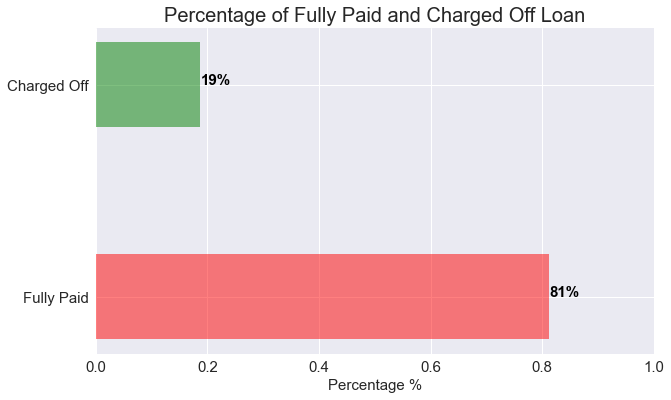

In [14]:
# Let's take a look at the distribuion between Fully Paid & Charged Off

# Creation of a df for each of the two variables
# FP: % Fully Paid and CO: % Charged Off
Total = dataset.loan_status.shape[0]
FP = dataset.loan_status.value_counts()["Fully Paid"] / Total
CO = dataset.loan_status.value_counts()["Charged Off"] / Total

#Plot data
plt.figure(figsize=(10,6))
plt.barh([1,2],[FP, CO], align= "center", color=["red","green"], height=0.4, alpha=0.5)

#Format axis
plt.yticks([1,2], labels=("Fully Paid","Charged Off"))
plt.tick_params(axis="both", labelsize=15)
plt.text(FP, 1, str("{0:.0%}".format(FP)), color='black', fontweight='bold', fontsize=15)
plt.text(CO, 2, str("{0:.0%}".format(CO)), color='black', fontweight='bold', fontsize=15)
plt.xlim(xmax=1)

#Legend & Title
plt.title("Percentage of Fully Paid and Charged Off Loan", fontsize=20)
plt.xlabel('Percentage %', fontsize=15)

**Observation** - The dataset is highly unbalanced. The dataset includes more *Fully Paid* loans than *Charged Off* loans. To prevent this from impacting our model we will create a balance dataset by selecting randomly an equal number of samples for each values (i.e *Fully Paid* and *Charged Off*).

### Set the labels to be 1 for Charged off else 0

In [15]:
dataset.loan_status[dataset.loan_status == "Charged Off"] = 1
dataset.loan_status[dataset.loan_status == "Fully Paid"] = 0

#Conver the column to an int column
dataset.loan_status = dataset.loan_status.astype(int)

#Display the change
dataset.loan_status.value_counts()

0    69982
1    16156
Name: loan_status, dtype: int64

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [16]:
dataset.isnull().mean()

id                       0.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_status        0.985407
settlement_date          0.985407
settlement_amount        0.985407
settlement_percentage    0.985407
settlement_term          0.985407
Length: 150, dtype: float64

### Drop the columns with more than 30% of missing data.

In [17]:
missing_df = pd.DataFrame(dataset.isnull().mean())
list_to_drop = missing_df[abs(missing_df)>0.3].dropna().index
print("They are "+ str(len(list_to_drop))+ " Features with more than 30% of missing data")
print(list_to_drop)

They are 58 Features with more than 30% of missing data
Index(['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'har

In [18]:
dataset = dataset.drop(list_to_drop, axis=1)

### How large is the remaining dataset ?

In [19]:
dataset.shape

(86138, 92)

**Observation** - We have dropped **58 features** which more than 30% of missing data. We have now **91 features (+1 label)** and 86,138 samples. Removing the feature with a lot of missing data will prevent overfitting by only selecting key features.

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

### In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep. Can you do the same.

/!\ I replaced "charged_off" with "chargeoff_within_12_mths" /!\

In [20]:
keep_list = ['chargeoff_within_12_mths','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

In [21]:
#Number of element in the list
len(keep_list)

40

### Drop all of the features except these ones from the dataset.

In [22]:
dataset = dataset.drop(dataset.columns.difference(keep_list), axis = 1)

### How large is the remaining dataset ?

In [23]:
dataset.shape

(86138, 40)

As expected we now have only 40 columns.
We now have:
- 39 features (+1 Label)
- 86,138 samples

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

In [24]:
#look at the correlation with the feature "loan_status" to look at the correlation with charged off
corr_df = dataset.corr()

#### Visualization of the correlation matrix with a heatmap

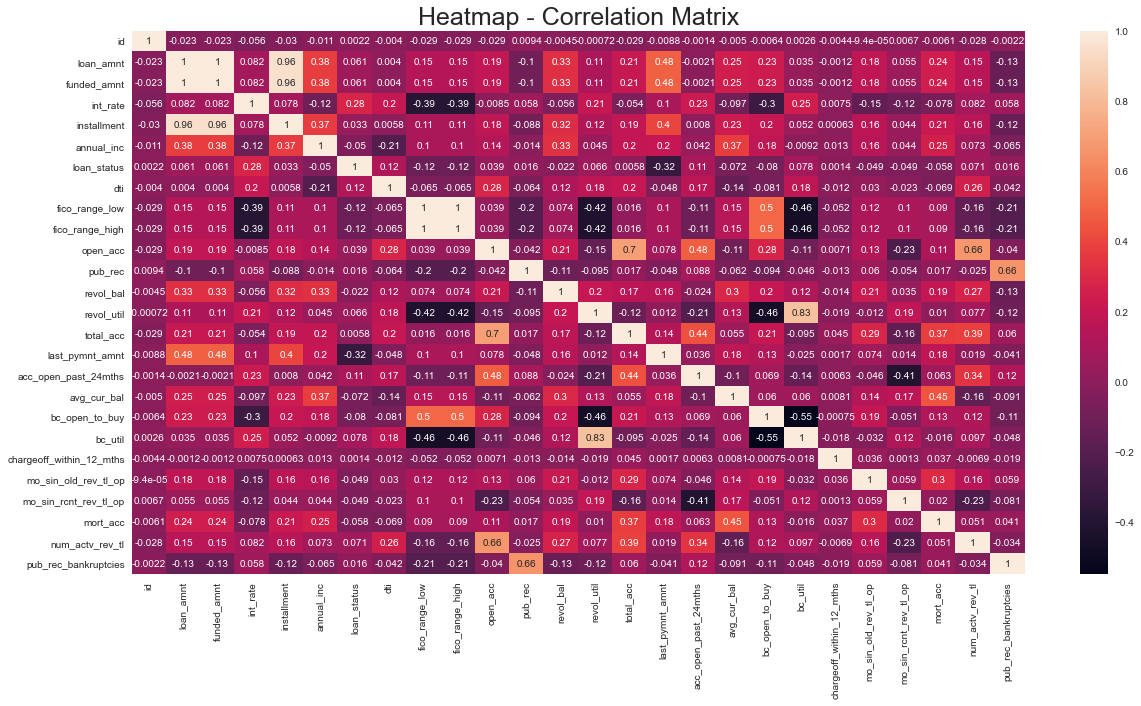

In [25]:
#Heatmap
plt.figure(figsize=(20,10))
plt.title("Heatmap - Correlation Matrix", fontsize=25)
#plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True)
sns.set_context(rc={"axes.labelsize":15})

In [26]:
#Features to remove
#We use the absolute value for the correlation
list_low_corr = corr_df[abs(corr_df.loan_status) < 0.03].index
print("Features with low correlation to remove: ", *list_low_corr, sep="\n - ")

Features with low correlation to remove: 
 - id
 - pub_rec
 - revol_bal
 - total_acc
 - chargeoff_within_12_mths
 - pub_rec_bankruptcies


In [27]:
#Drop the data
dataset.drop(columns=list_low_corr, inplace=True)

### How large is the resulting dataset ?

In [28]:
dataset.shape

(86138, 34)

With the correlation we removed **6 features**.
We now have:
- 33 features (+1 label)
- 86,138 samples

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              86138 non-null  float64
 1   funded_amnt            86138 non-null  float64
 2   term                   86138 non-null  object 
 3   int_rate               86138 non-null  float64
 4   installment            86138 non-null  float64
 5   grade                  86138 non-null  object 
 6   sub_grade              86138 non-null  object 
 7   emp_title              81416 non-null  object 
 8   emp_length             81421 non-null  object 
 9   home_ownership         86138 non-null  object 
 10  annual_inc             86138 non-null  float64
 11  verification_status    86138 non-null  object 
 12  loan_status            86138 non-null  int32  
 13  purpose                86138 non-null  object 
 14  title                  86138 non-null  object 
 15  zi

**Observation** - Looking at the table above, we still have **14 categorical** features. Before analyzing models we will need to treat those features.

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [30]:
cat_df = dataset.select_dtypes(include='object')
list_df = cat_df.columns

#### Let's look at the description of the data

In [31]:
#Download description
dic_df = pd.read_csv("./LCDataDictionary.csv", index_col=0)
pd.set_option('display.max_colwidth', None)

In [32]:
dic_df.loc[list_df,:]

,Description
LoanStatNew,
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
purpose,A category provided by the borrower for the loan request.
title,The loan title provided by the borrower


After having analysed the remained features we decided to remove the following:

1. "*title*": because of his redundancy with the feature "*purpose*".
2. "*earliest_cr_line*": because we considered that the month of the borrower's earliest reported credit line is not relevant to predict loan default.
3. "*zip_code*": because the info provided is already in the "*addr_state*" feature.
4. "*application_type*": as we have **only one unique value**.
5. "*grade*": as "*sub_grade*" already contains the same information, but with more granularity.
6. "*emp_title*": there are **32988 different employement title**, and this information is not as relevant as "*annual_inc*", thus we can remove this features moving forward.

In [33]:
# 1- Let's have a look at the purpose and title
title_df = pd.DataFrame({"Title":dataset.title.unique()})
purpose_df = pd.DataFrame({"Purpose":dataset.purpose.unique()})
title_df.join(purpose_df)

,Title,Purpose
0,Debt consolidation,debt_consolidation
1,Credit card refinancing,credit_card
2,Home improvement,home_improvement
3,Home buying,house
4,Medical expenses,medical
5,Other,other
6,Car financing,car
7,Major purchase,major_purchase
8,Moving and relocation,moving
9,Business,small_business


In [34]:
# 3 - Let's have a look at the zip_code and addr_state
zip_df = pd.DataFrame({"zip_code":dataset.zip_code.unique()})
addr_df = pd.DataFrame({"addr_state":dataset.addr_state.unique()})
zip_df.join(addr_df).head(10)

,zip_code,addr_state
0,235xx,VA
1,937xx,CA
2,658xx,MO
3,850xx,AZ
4,077xx,NJ
5,554xx,MN
6,201xx,WA
7,982xx,MD
8,208xx,MI
9,483xx,FL


**Observation** - "*zip_code*" seems to provide more granularity in the data.This granularity could bring useless information. "*addr_state*" contains the same information but it is grouped by states.

In [35]:
# 4- For application_type we only have one value 
dataset.application_type.unique()

array(['Individual'], dtype=object)

In [36]:
# 5- Comparison between grade and sub_grade
print("Grade Values")
print(dataset.grade.unique())
print("--"*10)
print("Sub Grade Values")
print(dataset.sub_grade.unique())

Grade Values
['C' 'A' 'D' 'B' 'E' 'F' 'G']
--------------------
Sub Grade Values
['C1' 'A3' 'D1' 'C3' 'B5' 'B4' 'C4' 'D5' 'B3' 'C5' 'D2' 'C2' 'B2' 'A4'
 'D3' 'B1' 'A5' 'E5' 'F1' 'E4' 'D4' 'E2' 'E1' 'G2' 'G1' 'F3' 'F2' 'A1'
 'A2' 'G3' 'E3' 'F4' 'G4' 'F5' 'G5']


**Observation** - "*sub_grade*" provides more granularity than "*grade*"

In [37]:
# 6- emp_title
dataset.emp_title.value_counts()

Teacher                             1576
Manager                             1437
Registered Nurse                     687
Owner                                681
RN                                   651
                                    ... 
Business Analyst/Product Manager       1
Assistant Professor of Research        1
Account Management                     1
Online Coordinator                     1
Instructional Specialist               1
Name: emp_title, Length: 32987, dtype: int64

In [38]:
#Drop the following features
dataset.drop(columns=["title","earliest_cr_line", "zip_code", "application_type", "grade", "emp_title"], inplace=True)

In [39]:
#Check the features were correctly removed
print("We now only have 9 categorical features to treat:")
print(" ", *dataset.select_dtypes(include='object').columns, sep="\n - ")

We now have only have now 9 categorical features to treat:
 
 - term
 - sub_grade
 - emp_length
 - home_ownership
 - verification_status
 - purpose
 - addr_state
 - initial_list_status


### Convert Term to a numerical feature

 **For term**: Possible values are "36" or "60", we will just convert the feature into an integer features

In [40]:
#Convert term
#Remove "months"
dataset.term = dataset.term.str.replace(" months","")
#Convert to int32
dataset.term = dataset.term.astype(int)

In [41]:
#Checking the change
dataset.term.value_counts()

36    67507
60    18631
Name: term, dtype: int64

### Decide if you want to do anything to emp_length

In [42]:
#Look at the values of emp_length
dataset.emp_length.unique()

array(['10+ years', '8 years', '6 years', '< 1 year', '2 years',
       '9 years', '7 years', '3 years', '1 year', nan, '4 years',
       '5 years'], dtype=object)

In [43]:
#Look at the values of emp_length with respect to the loan_status
lenght_df = pd.DataFrame(dataset.groupby('emp_length')["loan_status"].value_counts())
lenght_df.columns = ["Count"]
lenght_df = lenght_df.reset_index()

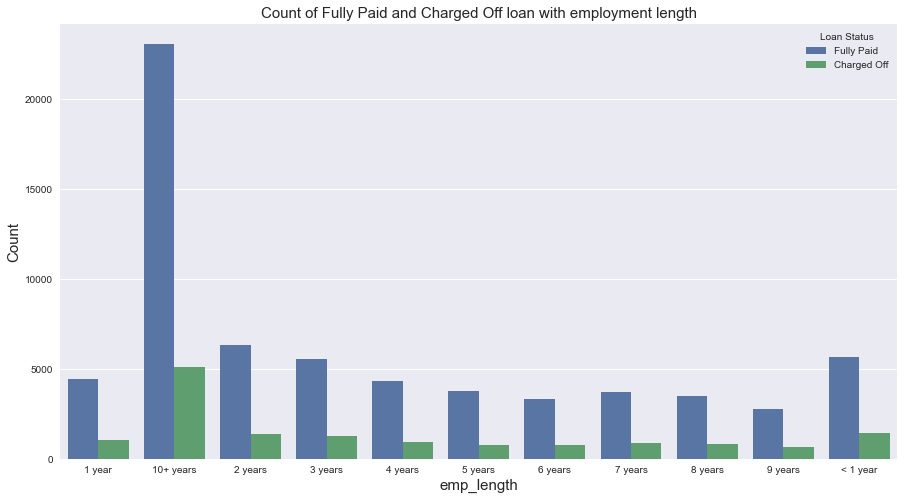

In [44]:
# Visualization
plt.figure(figsize=(15,8))
plt.title("Count of Fully Paid and Charged Off loan with employment length", fontsize=15)
ax = sns.barplot(data = lenght_df, x = "emp_length", y = "Count", hue= "loan_status")
handles, labels = ax.get_legend_handles_labels()
labels=['Fully Paid', 'Charged Off']
ax.legend(handles=handles, labels= labels, title="Loan Status")

**Observation** - Looking at the graph above we see that from 0 years to 10 years the proportion of Fully Paid and Charge Off loan remained almost the same. We only have an increase for 10+ years because it regroups all years above 10 years. <br> <br>
To confirm our instuition let's look at the distribution.

In [45]:
#Compute proportion for each emp_lenght
list_pct = []
for lenght in lenght_df.emp_length.unique():
    fp = lenght_df[lenght_df.emp_length==lenght].Count.values[0]
    co = lenght_df[lenght_df.emp_length==lenght].Count.values[1]
    #pct
    fp_pct = fp/(fp+co)
    co_pct = co/(fp+co)
    #Append
    list_pct.append(fp_pct)
    list_pct.append(co_pct)

lenght_df["percentage"] = list_pct    

(0.0, 1.0)

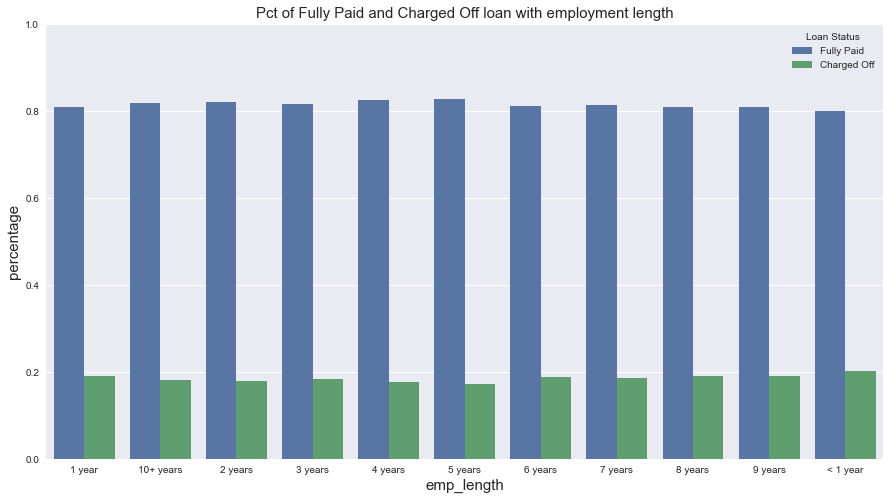

In [46]:
# Visualization
plt.figure(figsize=(15,8))
plt.title("Pct of Fully Paid and Charged Off loan with employment length", fontsize=15)
ax = sns.barplot(data = lenght_df, x = "emp_length", y = "percentage", hue= "loan_status")
handles, labels = ax.get_legend_handles_labels()
labels=['Fully Paid', 'Charged Off']
ax.legend(handles=handles, labels= labels, title="Loan Status")
plt.ylim((0,1))

**Observation** - Looking at the graph above we can confirm our first intuition. Thus, "*emp_length*" doesn't carry any useful information about the likelihood of *charged off* loan. **We can drop "*emp_length*"**.

In [47]:
#Drop emp_length
dataset.drop(columns=["emp_length"], inplace=True)

### Is sub_grade worth keeping ?

In [48]:
#Subgrade 
print("--"*10)
print("Sub Grade Values")
print(dataset.sub_grade.unique())

--------------------
Sub Grade Values
['C1' 'A3' 'D1' 'C3' 'B5' 'B4' 'C4' 'D5' 'B3' 'C5' 'D2' 'C2' 'B2' 'A4'
 'D3' 'B1' 'A5' 'E5' 'F1' 'E4' 'D4' 'E2' 'E1' 'G2' 'G1' 'F3' 'F2' 'A1'
 'A2' 'G3' 'E3' 'F4' 'G4' 'F5' 'G5']


In [49]:
#Look at the values of emp_length with respect to the loan_status
grade_df = pd.DataFrame(dataset.groupby('sub_grade')["loan_status"].value_counts())
grade_df.columns = ["Count"]
grade_df = grade_df.reset_index()

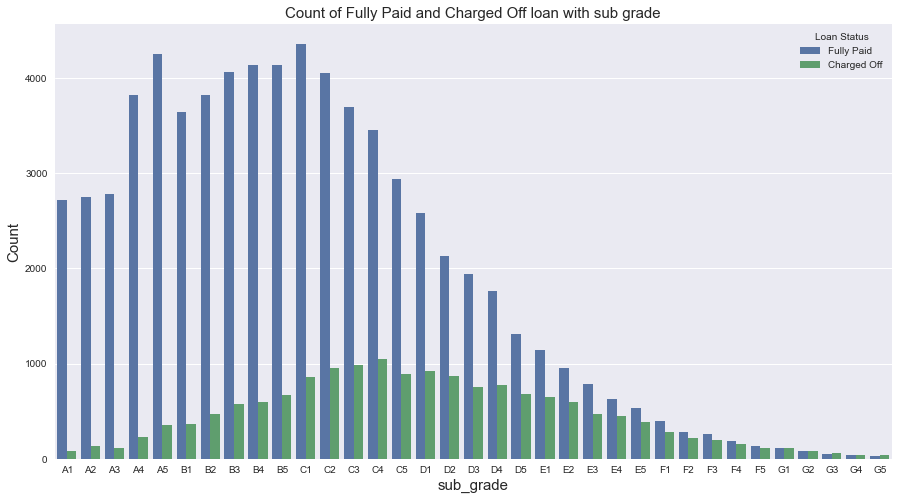

In [50]:
# Visualization
plt.figure(figsize=(15,8))
plt.title("Count of Fully Paid and Charged Off loan with sub grade", fontsize=15)
ax=sns.barplot(data = grade_df, x = "sub_grade", y = "Count", hue= "loan_status")
handles, labels = ax.get_legend_handles_labels()
labels=['Fully Paid', 'Charged Off']
ax.legend(handles=handles, labels= labels, title="Loan Status")

**Observation** - Looking at the graph above, we see that there is a correlation between the *sub grade* of the loan and probability of default. The higher the grade (i.e further from A) the higher the probability of default. Keeping "*sub_grade*" make sense, as it carries information on the likelihood of a *charged off* loan.

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

### Do you want to do anything to Annual Income ?

#### Feature : Annual Income

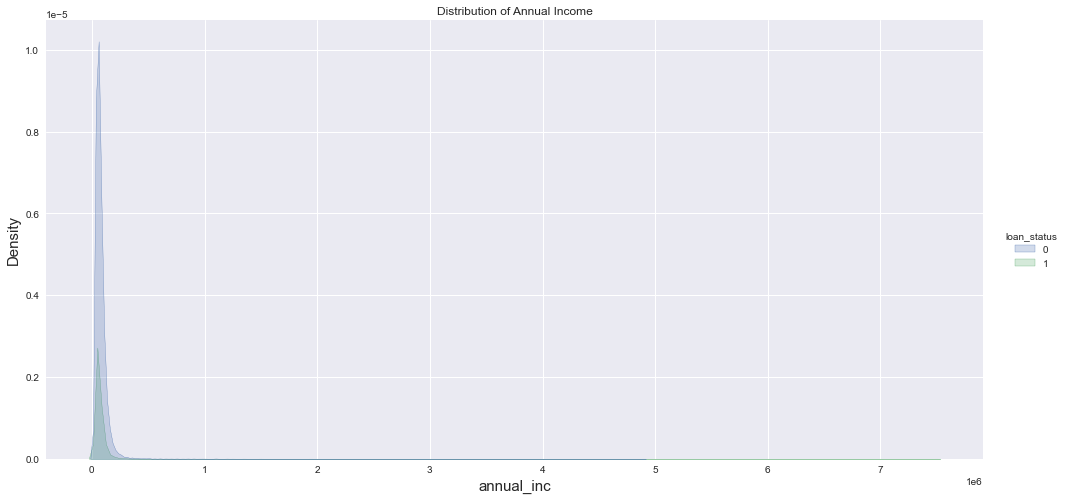

In [51]:
#Visualize the distribution
sns.displot(dataset, x="annual_inc", hue="loan_status", kind="kde",
            height=7, aspect=2, fill=True).set(title="Distribution of Annual Income")

**Observation** - We see above that the distribution of the income is skew on one side. Thus, we need to modify the data. <br><br>
We take the **logarithm of 'income'** to make this variable more normally distributed. Indeed, the log has the effect of de-scaling the large number for ease of handling. **This transformation is often use in economics.**

In [52]:
dataset.annual_inc = np.log(dataset.annual_inc)

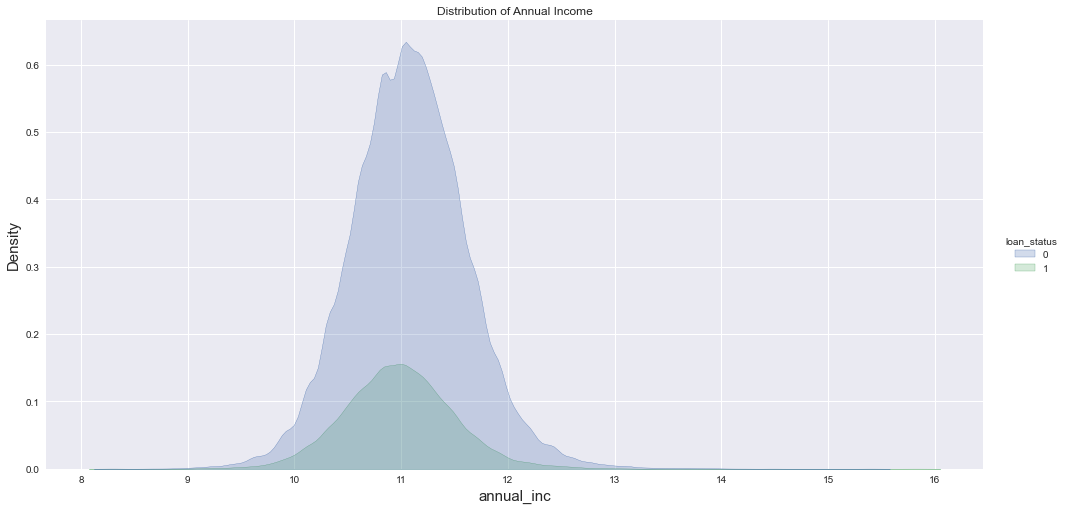

In [53]:
#Visualize the distribution
sns.displot(dataset, x="annual_inc", hue="loan_status", kind="kde",
            height=7, aspect=2, fill=True).set(title="Distribution of Annual Income")

### How do you want to treat the two FICO scores ?

In [54]:
#Let's us look first at the values with respect to loan_status
dataset[["loan_status",'fico_range_low', 'fico_range_high']].head(5)

,loan_status,fico_range_low,fico_range_high
0,0,750.0,754.0
1,1,710.0,714.0
2,0,685.0,689.0
4,1,685.0,689.0
5,0,680.0,684.0


In [55]:
#Let's look at the correlation
dataset[["loan_status",'fico_range_low', 'fico_range_high']].corr()

,loan_status,fico_range_low,fico_range_high
loan_status,1.000000,-0.121892,-0.121891
fico_range_low,-0.121892,1.000000,1.000000
fico_range_high,-0.121891,1.000000,1.000000


**Observation** - "*fico_range_low*" and "*fico_range_high*" are highly correlated with a correlation of 1. Their correlation with "*loan_status*" is also almost the same. We have two possibilities moving forward:
1. Keep one of the two features
2. Compute the average of the two features

To keep the information of both data we will compute the average

In [56]:
#Compute average
dataset["fico"] = dataset.fico_range_low*0.5 + dataset.fico_range_high*0.5
#drop 'fico_range_low' and 'fico_range_high'
dataset.drop(columns=['fico_range_low', 'fico_range_high'], inplace = True)

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

### Decide how to handle the categorical data in columns ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

### You may wish to use a LabelEncoder


In [57]:
from sklearn.preprocessing import LabelEncoder

- We already treated "*application_status*" feature above. (see 4.1.1)
- We still have to treat: 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'sub_grade'

In [58]:
#Look at the values for each features
cat_list = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status','sub_grade']

for features in cat_list:
    print(features)
    print(dataset[features].unique())
    print("--"*15)

home_ownership
['RENT' 'MORTGAGE' 'OWN' 'ANY']
------------------------------
verification_status
['Source Verified' 'Not Verified' 'Verified']
------------------------------
purpose
['debt_consolidation' 'credit_card' 'home_improvement' 'house' 'medical'
 'other' 'car' 'major_purchase' 'moving' 'small_business' 'vacation'
 'renewable_energy' 'wedding']
------------------------------
addr_state
['VA' 'CA' 'MO' 'AZ' 'NJ' 'MN' 'WA' 'MD' 'MI' 'FL' 'NY' 'KY' 'IN' 'CO'
 'IL' 'NC' 'AL' 'CT' 'KS' 'TX' 'PA' 'UT' 'GA' 'HI' 'NM' 'NH' 'TN' 'MA'
 'OH' 'SD' 'OK' 'SC' 'OR' 'LA' 'VT' 'DC' 'RI' 'NV' 'WV' 'WI' 'AR' 'MT'
 'MS' 'WY' 'AK' 'DE']
------------------------------
initial_list_status
['w' 'f']
------------------------------
sub_grade
['C1' 'A3' 'D1' 'C3' 'B5' 'B4' 'C4' 'D5' 'B3' 'C5' 'D2' 'C2' 'B2' 'A4'
 'D3' 'B1' 'A5' 'E5' 'F1' 'E4' 'D4' 'E2' 'E1' 'G2' 'G1' 'F3' 'F2' 'A1'
 'A2' 'G3' 'E3' 'F4' 'G4' 'F5' 'G5']
------------------------------


How are we going to treat each features above ?
1. "*home_ownership*": We will use **one hot encoding** here.
2. "*verification_status*": **Map it by hand** as we have three values.
3. "*purpose*": The number of values is quite large so one-hot encoding can lead to high memory consumption. Thus, we choose to use **label encoder**.
4. "*addr_state*": The number of values is quite large so one-hot encoding can lead to high memory consumption. Thus, we choose to use **label encoder**.
5. "*initial_list_status*": **Map it by hand** as it has only two values
6. "*sub_grades*": The number of values is quite large so one-hot encoding can lead to high memory consumption. Thus, we choose to use **label encoder**.

In [59]:
#1. Let's treat home_ownership
one_hot = pd.get_dummies(dataset.home_ownership)
dataset = dataset.join(one_hot)
dataset.drop(columns=["home_ownership"], inplace=True)

In [60]:
#2. verification_status
emb_mapping = {'Source Verified':2, 'Not Verified':0, 'Verified':1}
dataset.rename(columns={"verification_status":"verification_status_2"}, inplace=True)
dataset["verification_status"] = dataset.verification_status_2.map(emb_mapping)
dataset.drop(columns=["verification_status_2"], inplace=True)
dataset.verification_status.value_counts()

2    34041
0    28652
1    23445
Name: verification_status, dtype: int64

In [61]:
#3. purpose
le = LabelEncoder()
dataset.purpose = le.fit_transform(dataset.purpose.values)
dataset.purpose.unique()

array([ 2,  1,  3,  4,  6,  8,  0,  5,  7, 10, 11,  9, 12])

In [62]:
#4. addr_state
dataset.addr_state = le.fit_transform(dataset.addr_state.values)
dataset.addr_state.unique()

array([40,  4, 21,  3, 26, 20, 42, 18, 19,  9, 29, 15, 13,  5, 12, 24,  1,
        6, 14, 38, 33, 39, 10, 11, 27, 25, 37, 17, 30, 36, 31, 35, 32, 16,
       41,  7, 34, 28, 44, 43,  2, 23, 22, 45,  0,  8])

5. initial status <br>
"*initial_list_status"*" has only two values "w" and "f". Thus, we choose to do the following transformation
- "w" ==> 1
- "f" ==> 0

In [63]:
emb_mapping = {'w':1, 'f':0}
dataset.rename(columns={"initial_list_status":"initial_list_status_2"}, inplace=True)
dataset["initial_list_status"] = dataset.initial_list_status_2.map(emb_mapping)
dataset.drop(columns=["initial_list_status_2"], inplace=True)
dataset.initial_list_status.value_counts()

1    43882
0    42256
Name: initial_list_status, dtype: int64

In [64]:
#6. sub_grade
dataset.sub_grade = le.fit_transform(dataset.sub_grade.values)
dataset.sub_grade.unique()

array([10,  2, 15, 12,  9,  8, 13, 19,  7, 14, 16, 11,  6,  3, 17,  5,  4,
       24, 25, 23, 18, 21, 20, 31, 30, 27, 26,  0,  1, 32, 22, 28, 33, 29,
       34])

In [65]:
#Check that we treated all categorical data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86138 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              86138 non-null  float64
 1   funded_amnt            86138 non-null  float64
 2   term                   86138 non-null  int32  
 3   int_rate               86138 non-null  float64
 4   installment            86138 non-null  float64
 5   sub_grade              86138 non-null  int32  
 6   annual_inc             86138 non-null  float64
 7   loan_status            86138 non-null  int32  
 8   purpose                86138 non-null  int32  
 9   addr_state             86138 non-null  int32  
 10  dti                    86138 non-null  float64
 11  open_acc               86138 non-null  float64
 12  revol_util             86094 non-null  float64
 13  last_pymnt_amnt        86138 non-null  float64
 14  acc_open_past_24mths   86138 non-null  float64
 15  av

<a id='3.4'></a>
## 4.3. Sampling Data

### To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.

In [66]:
#Fully paid and Charged Off Df
FP_df = dataset[dataset.loan_status == 0]
CO_df = dataset[dataset.loan_status == 1]

#Random selection
FP_subset_df = FP_df.sample(n=5500, random_state=123)
CO_subset_df = CO_df.sample(n=5500, random_state=123)

#Concat two dataframes
sub_dataset = pd.concat([FP_subset_df, CO_subset_df])

In [67]:
sub_dataset.shape

(11000, 29)

### Choose a method to handle any NAs that may be in a column.

In [68]:
#Look at na values
sub_dataset.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
sub_grade                  0
annual_inc                 0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
revol_util                 5
last_pymnt_amnt            0
acc_open_past_24mths       0
avg_cur_bal                0
bc_open_to_buy           134
bc_util                  139
mo_sin_old_rev_tl_op       0
mo_sin_rcnt_rev_tl_op      0
mort_acc                   0
num_actv_rev_tl            0
fico                       0
ANY                        0
MORTGAGE                   0
OWN                        0
RENT                       0
verification_status        0
initial_list_status        0
dtype: int64

Three features have na_values:
- bc_open_to_buy
- bc_util
- revol_util

Let's see how many rows contains those na values

In [69]:
#Look at na values but by row
sub_dataset.isna().sum(axis=1).astype(bool).sum()

139

This represent around 1.26% of the total data. Thus, we can drop them rows it should have a large impact.

In [70]:
#Drop na in the dataset
sub_dataset.dropna(inplace = True)

In [71]:
#Look at na values were correctly treated
sub_dataset.isna().sum()

loan_amnt                0
funded_amnt              0
term                     0
int_rate                 0
installment              0
sub_grade                0
annual_inc               0
loan_status              0
purpose                  0
addr_state               0
dti                      0
open_acc                 0
revol_util               0
last_pymnt_amnt          0
acc_open_past_24mths     0
avg_cur_bal              0
bc_open_to_buy           0
bc_util                  0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_rev_tl_op    0
mort_acc                 0
num_actv_rev_tl          0
fico                     0
ANY                      0
MORTGAGE                 0
OWN                      0
RENT                     0
verification_status      0
initial_list_status      0
dtype: int64

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [72]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import HelpfulFunctions as hp

### Use an 80:20 split

In [73]:
#Train test split
X = sub_dataset.drop("loan_status", axis=1)
y= sub_dataset.loan_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.

In [151]:
def plotROCCurve(clf, X_train, X_test, y_train, y_test):
    #Compute
    clf.fit(X_train,y_train)
    if clf == LogisticRegression():
        y_score = clf.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    else:
        y_score = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    
    #Metrics
    print(clf.__class__)
    area = auc(fpr,tpr)
    print("AUC:%5.4f"%area)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))
    
    #Plot
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label="AUC:%5.4f"%area)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc="lower right", fontsize=13)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic -- ' + str(type(clf).__name__), fontsize=15)
    

In [152]:
def get_metrics(clf, X_train, X_test, y_train, y_test):
    #Compute
    clf.fit(X_train,y_train)
    if clf == LogisticRegression():
        y_score = clf.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    else:
        y_score = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    
    #Metrics
    area = auc(fpr,tpr)
    print("AUC:%5.4f"%area)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [154]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(random_state=123)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=123)))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier(random_state=123)))
# Boosting methods
models.append(('AB', AdaBoostClassifier(random_state=123)))
# Bagging methods
models.append(('RF', RandomForestClassifier(random_state=123)))

Let's look at the ROC curve and metrics for each model to have a first idea of how the model do on our dataset.

--------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
AUC:0.9052
              precision    recall  f1-score   support

           0     0.8686    0.7425    0.8006      1068
           1     0.7817    0.8914    0.8330      1105

    accuracy                         0.8182      2173
   macro avg     0.8252    0.8170    0.8168      2173
weighted avg     0.8244    0.8182    0.8171      2173

--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
AUC:0.8119
              precision    recall  f1-score   support

           0     0.8107    0.6657    0.7311      1068
           1     0.7245    0.8498    0.7822      1105

    accuracy                         0.7593      2173
   macro avg     0.7676    0.7578    0.7566      2173
weighted avg     0.7669    0.7593    0.7571      2173

--------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
AUC:0.7819
              precision    recall  f1-score   support

           0   

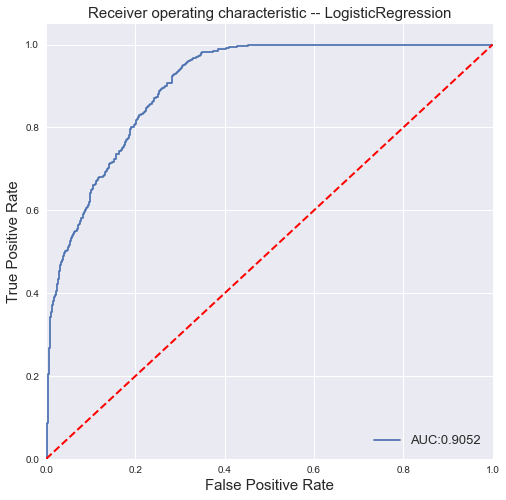

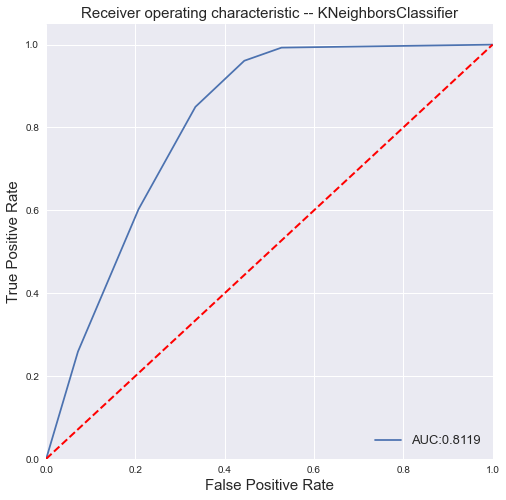

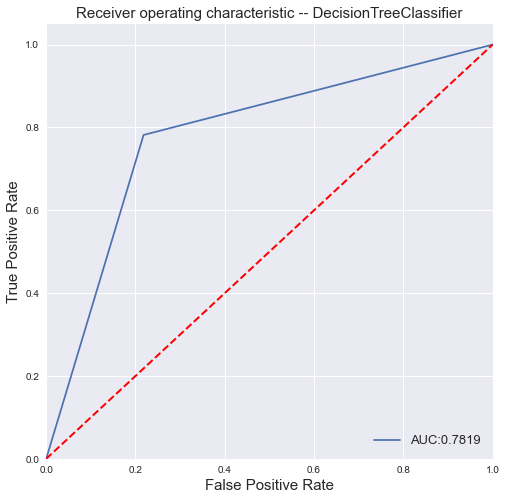

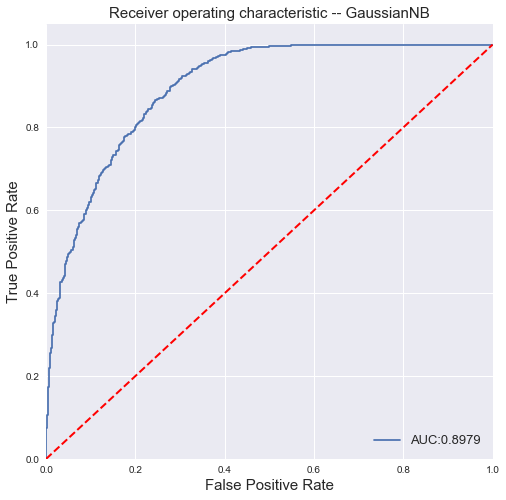

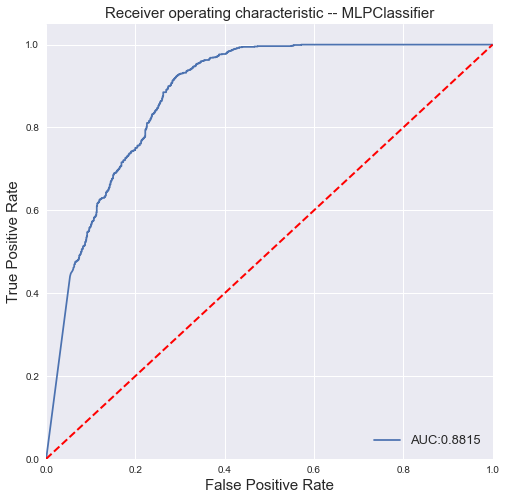

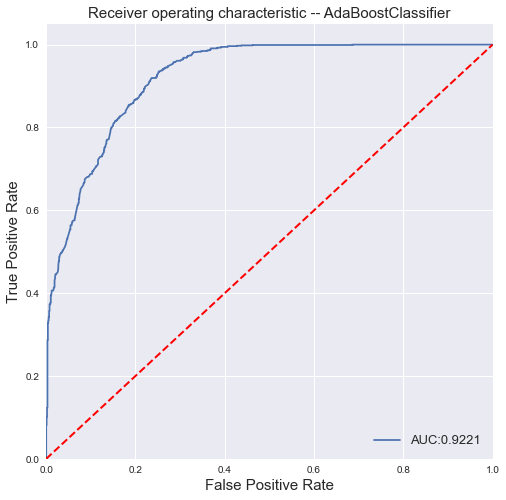

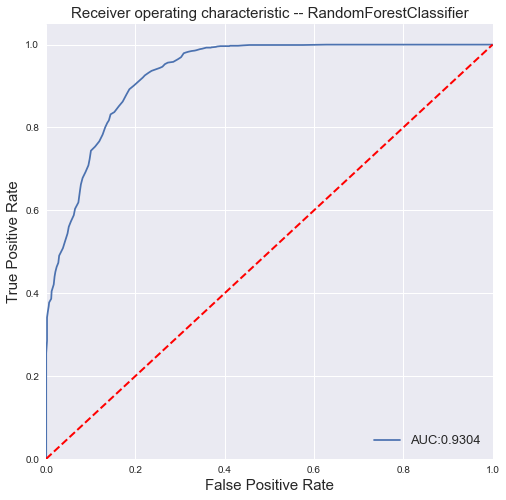

In [155]:
for m in models:
    print('--'*10)
    plotROCCurve(m[1], X_train, X_test, y_train, y_test)
print('--'*10)

### K-folds cross validation

In [156]:
k_fold = KFold(n_splits=10, random_state=123, shuffle=True)
for m in models:
    res = cross_val_score(m[1], X, y, cv=k_fold, n_jobs=-1, scoring="roc_auc")
    print("--"*10)
    print(m[1].__class__)
    print("Mean: " + str(round(res.mean(),4)) + " & Std: " +str(round(res.std(),4)))
print("--"*10)

--------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Mean: 0.8933 & Std: 0.0122
--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Mean: 0.8142 & Std: 0.0105
--------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Mean: 0.7932 & Std: 0.0159
--------------------
<class 'sklearn.naive_bayes.GaussianNB'>
Mean: 0.8937 & Std: 0.0098
--------------------
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Mean: 0.8794 & Std: 0.0131
--------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Mean: 0.9255 & Std: 0.0094
--------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Mean: 0.9296 & Std: 0.0078
--------------------


### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

<AxesSubplot:title={'center':'Boxplot of the score for each model'}, xlabel='Classification Model', ylabel='Score'>

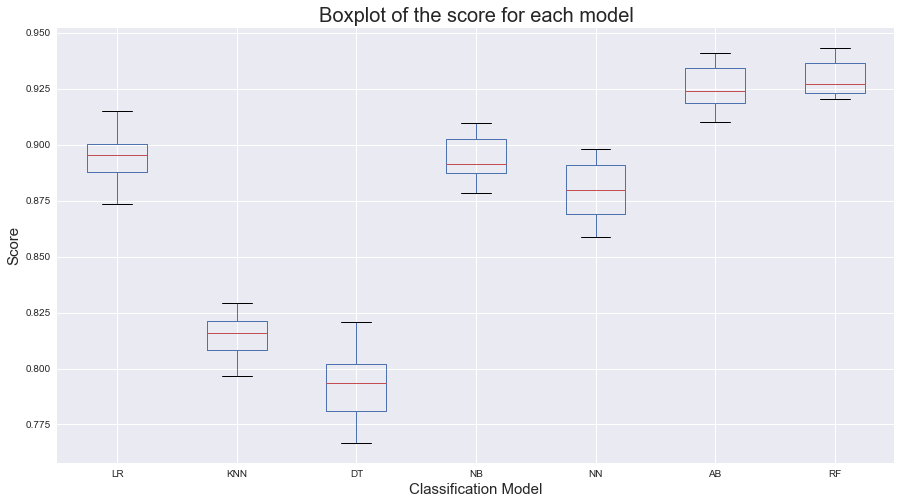

In [157]:
list_clf= [x[0] for x in models]
res_df = pd.DataFrame(columns=list_clf)
for m in models:
    res = cross_val_score(m[1], X, y, cv=k_fold, n_jobs=-1, scoring="roc_auc")
    res_df[m[0]] = res
    

#Plot
plt.figure(figsize=(15,8))
plt.title("Boxplot of the score for each model", fontsize=20)
plt.xlabel("Classification Model")
plt.ylabel("Score")
res_df.boxplot(column=list_clf)

**Observation**  from the boxplot above we can see that *Decision Tree* is the model with the **highest AUC mean** and the **lowest AUC variance**. Movind  forward, we will use the *Decision Tree* model
<br> <br>
Here, the second best model was *AdaBoost*.

<a id='5'></a>
# 6. Model Tuning and Grid Search

### Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model. Do this using the GridSearch features in Scikit Learn.

In [158]:
from sklearn.model_selection import GridSearchCV

Below are the following hyperparameters we want to tune:
1. Number of decision trees we will use in the random forest (i.e n_estimators)
2. Depth of each decision trees, as it has an impact on the overfitting (i.e max_depth)
3. Number of features used in each decision tree (i.e max_features)
4. Best metrics to compute purity: 'gini', 'entropy' or "log_loss"

With more computation power we could:
- Consider more values for n_estimators, max_depth
- Look at the best "max_samples", the number of samples to draw from X to train each base estimator.

In [229]:
%%time

n_estimators = [int(x) for x in np.linspace(10,300,4)]
max_depth = [int(x) for x in np.linspace(5,30,4)]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'criterion':criterion}

#Specify random_state because it controls both the randomness of the bootstrapping of the samples
rd = RandomForestClassifier(random_state=123)

grid = GridSearchCV(rd, param_grid, cv = 10, scoring = 'roc_auc')
grid.fit(X_train,y_train)

print ("Best roc_auc score: %5.3f"%grid.best_score_)
#Parameter setting that gave the best results
print (grid.best_params_)
print (grid.best_estimator_)

Best roc_auc score: 0.930
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 300}
RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       n_estimators=300, random_state=123)
Wall time: 22min 30s


Output:<br>
Best roc_auc score: 0.930<br>
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 300}<br>
RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',<br>
                       n_estimators=300, random_state=123)<br>
Wall time: 22min 30s<br>

<a id='6'></a>
# 7. Finalise the Model

### Finalize Model with best parameters found during tuning step.

In [159]:
#Model with tune features
max_depth= 13
max_features= 'auto'
n_estimators= 300
criterion = 'entropy'

rd = RandomForestClassifier(n_estimators= n_estimators,
                            max_depth= max_depth,
                            max_features= max_features,
                            criterion = criterion,
                            random_state=123)

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report. Discuss results.

In [160]:
from sklearn.metrics import accuracy_score

----- Accuracy Score -----
0.8509
----- Classification report -----
              precision    recall  f1-score   support

           0     0.8924    0.7921    0.8393      1068
           1     0.8188    0.9077    0.8609      1105

    accuracy                         0.8509      2173
   macro avg     0.8556    0.8499    0.8501      2173
weighted avg     0.8550    0.8509    0.8503      2173

----- Confusion matrix -----


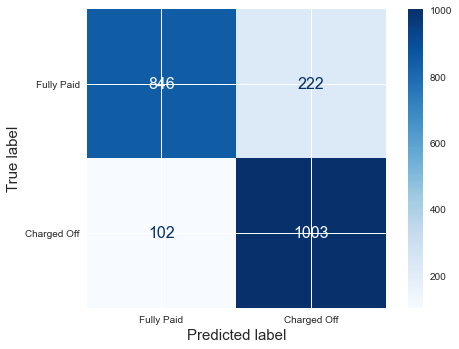

In [161]:
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)
#Confusion Matrix

#Metrics
print('-'*5, "Accuracy Score", "-"*5)
acc = accuracy_score(y_test, y_pred)
print(round(acc, 4))

print('-'*5, "Classification report", "-"*5)
print(classification_report(y_test, y_pred, digits=4))

print('-'*5, "Confusion matrix", "-"*5)
hp.plot_cm(rd, X_test, y_test, labels=['Fully Paid','Charged Off'])

#### Discussion of the result
The worst scenario for a lender is to predict "*Fully Paid*" but having in reality "*Charged off*". It's in this case that the lender will lose the more money as the lender will lose partial or the entire capital lent. According to the confusion matrix above, we have 102 FP (i.e False Positive). Our model should aim to reduce th number of FP, and it does it almost very well.

### Calculate the ROC curve for the model and its AUC

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
AUC:0.9299
              precision    recall  f1-score   support

           0     0.8924    0.7921    0.8393      1068
           1     0.8188    0.9077    0.8609      1105

    accuracy                         0.8509      2173
   macro avg     0.8556    0.8499    0.8501      2173
weighted avg     0.8550    0.8509    0.8503      2173



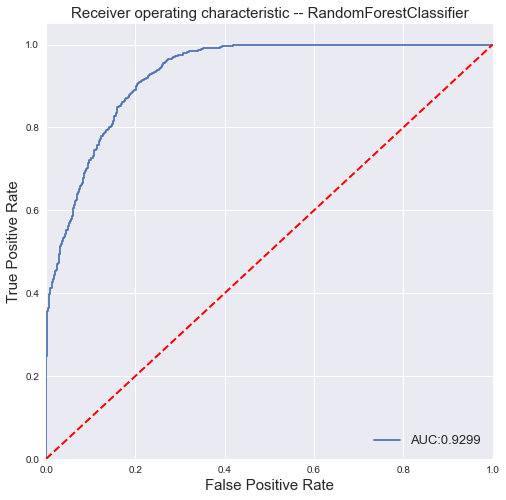

In [163]:
plotROCCurve(rd, X_train, X_test, y_train, y_test)

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

### Examine the importance of each of the model features. Some models may have a features_importances property. For others you may need to loop over features and exclude/include them to determine their impact on the score.

Gradient boosting is an ensemble method, that is used a lot in machine learning for its speed and accuracy. It's a method that transform weak learners into strong learners. It functions like AdaBoost with Decision Trees. <br>
Looking at the boxplot above decision tree is a weak learner in our case, so using gradient boosting make sense.

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

For the hyperparameters we are going to those find above for the random forest.

In [227]:
gbm = GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.1,
                                max_depth=13,
                                max_features='auto',
                                random_state= 123)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
AUC:0.9337
              precision    recall  f1-score   support

           0     0.8966    0.7959    0.8433      1068
           1     0.8220    0.9113    0.8644      1105

    accuracy                         0.8546      2173
   macro avg     0.8593    0.8536    0.8538      2173
weighted avg     0.8587    0.8546    0.8540      2173

Wall time: 42 s


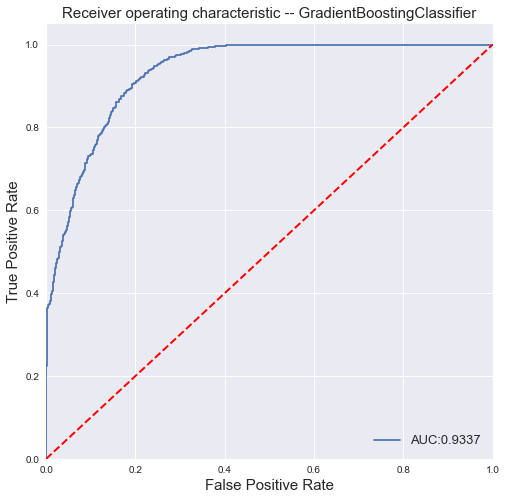

In [228]:
%%time
#Let's look at the fit of the model
plotROCCurve(gbm, X_train, X_test, y_train, y_test)

**Observation** - The gradient boosting classifier has a **higher AUC** and **Accuracy** compared to the Random forest for which we tuned the hyperparameters. Gradient Boosting is a better model than Random Forest.

| Model | AUC | Accuracy |
| --- | --- | --- |
| Tuned Random Forest | 0.9299 | 0.8509 |
| Gradient Boosting | 0.9337 | 0.8546 |


### Feature Importance using individual Features

In [213]:
gbm.fit(X_train, y_train)
imp_feat = gbm.feature_importances_
imp_feat_df = pd.DataFrame(index=X_train.columns)
imp_feat_df["feature_importance"] = imp_feat
imp_feat_df = imp_feat_df.sort_values(by="feature_importance", ascending=False)
imp_feat_df

,feature_importance
last_pymnt_amnt,0.489609
term,0.084914
int_rate,0.054688
dti,0.030604
mo_sin_old_rev_tl_op,0.028863
bc_util,0.027059
avg_cur_bal,0.026876
installment,0.025684
annual_inc,0.024710
bc_open_to_buy,0.024703


The four most important features are "*last_pymnt_amnt*", "*int_rate*", "*term*", and "*dti*". Let's look at the description for those four features.

In [215]:
dic_df.loc[["last_pymnt_amnt", "int_rate", "term", "dti"],:]

,Description
LoanStatNew,
last_pymnt_amnt,Last total payment amount received
int_rate,Interest Rate on the loan
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."


We see that each feature have an intuitive **economic meaning** to be ranked high. Let's note that "*sub_grade*" is not ranked among the highest parameter. <br>
The last point seems a bit strange. Let's go further by looking at the importance of each feature independently.

In [216]:
from tqdm import tqdm

In [217]:
%%time
n_feats = len(X.columns)
scores_list = []
for i in tqdm(range(n_feats)):
        X_one_feature = pd.DataFrame(X_train.iloc[:, i])
        scores = cross_val_score(gbm, X_one_feature, y_train, cv=10)
        scores_list.append((X.columns.values[i],scores.mean()))

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [10:20<00:00, 22.17s/it]

Wall time: 10min 20s


In [218]:
#Display
score_df = pd.DataFrame(scores_list)
score_df.columns=["feature", "score"]
score_df.sort_values(by=["score"], ascending=False)

,feature,score
12,last_pymnt_amnt,0.802372
3,int_rate,0.647678
5,sub_grade,0.646758
2,term,0.621316
26,verification_status,0.559045
21,fico,0.555827
4,installment,0.555594
13,acc_open_past_24mths,0.552029
0,loan_amnt,0.539018
1,funded_amnt,0.539018


Comparing both results we see that "*int_rate*" and "*last_pymnt_amnt*" are still in the top three features. However, we observe "*sub_grade*" here is the third features. 

### Feature Importance using Recursive Feature Elimination

In [204]:
from sklearn.feature_selection import RFE

In [221]:
rfe = RFE(estimator=gbm, n_features_to_select=5)
rfe.fit(X_train, y_train)
n_feats = len(X.columns)
 
for i in tqdm(range(n_feats)):
    if rfe.support_[i] == True:
        print(X.columns[i], end="\n - ")

100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]

term
 - int_rate
 - dti
 - last_pymnt_amnt
 - bc_open_to_buy
 - 

**Observation** -Four out of the five features are the same as above when we used *feature_importances_*, confirming the results we got above.

# My Suggestions

This is where you can put your own extra analysis work if you wish. Try to keep it to one main idea. This will help your coursework grade, especially if makes the model work better ;-)

#### Kfold
Through out the study we used a 10 Kfold. One could wonder if:
- The Kfold impact the decision of the the model to use
- A lower or higher number of Kfold impact the ROC AUC
- Could another value for the Kfold lead to a better result

Let's us look at the ROC AUC for different N Kfold

In [177]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [178]:
X_bis = X.reset_index()
y_bis = y.reset_index()

X_bis.drop(columns=["index"], inplace=True)
y_bis.drop(columns=["index"], inplace=True)

In [201]:
# Run classifier with cross-validation and plot ROC curves
def plotROC_fold(clf, X, y):
    cv = KFold(n_splits=15, random_state=123, shuffle=True)
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(15,8))
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X_bis.iloc[train,:], y_bis.iloc[train, :])
        viz = RocCurveDisplay.from_estimator(classifier,
            X_bis.iloc[test, :],
            y_bis.iloc[test,:],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8)

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05])
    
    ax.set_title(
                 "Receiver operating characteristic example - "+ str(type(clf).__name__), 
                 fontdict={'fontsize':15})
    ax.legend(loc=(1.04, 0))
    plt.show()

--------------------


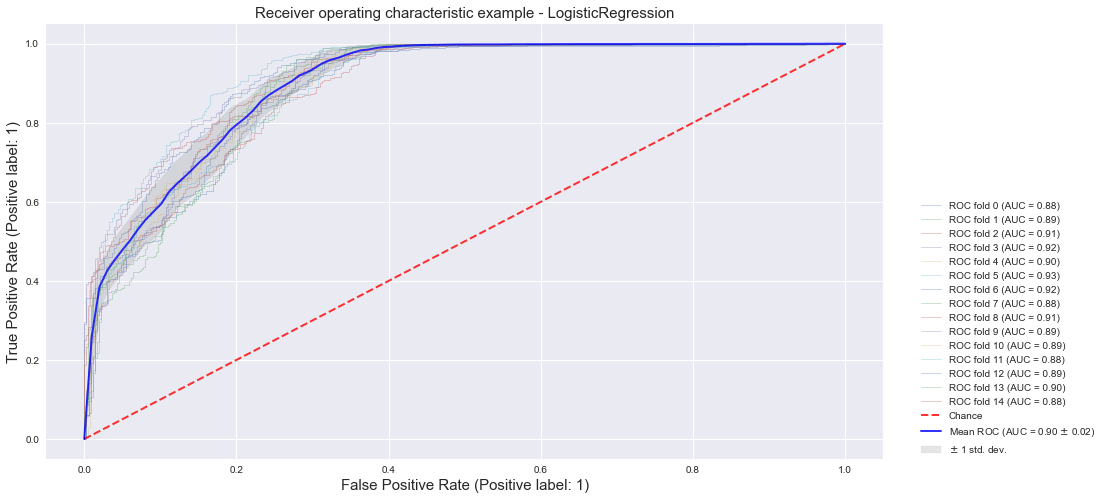

--------------------


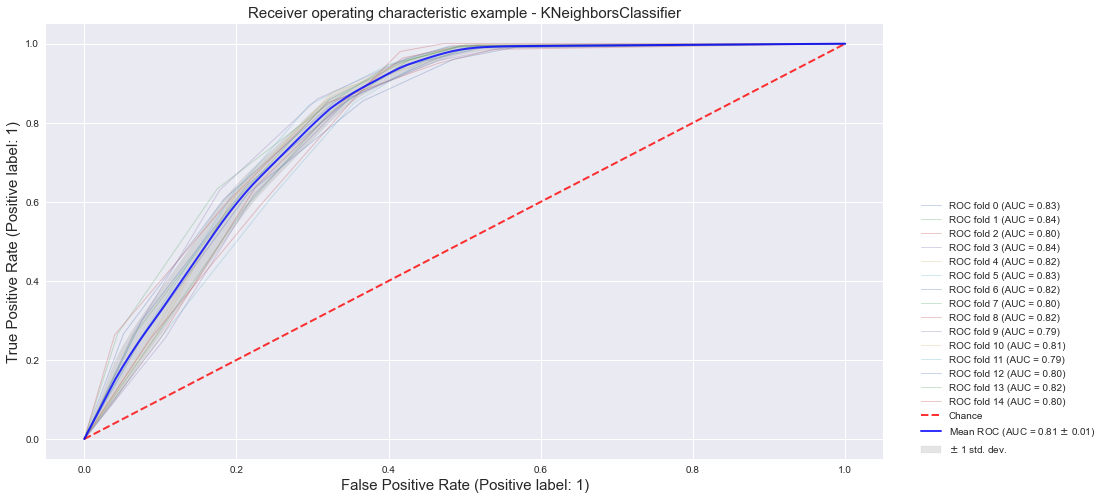

--------------------


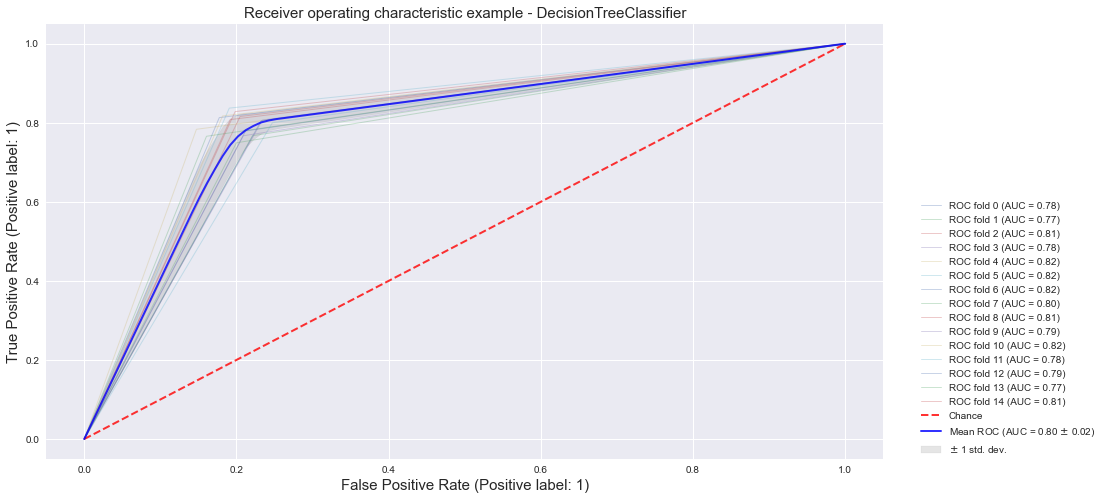

--------------------


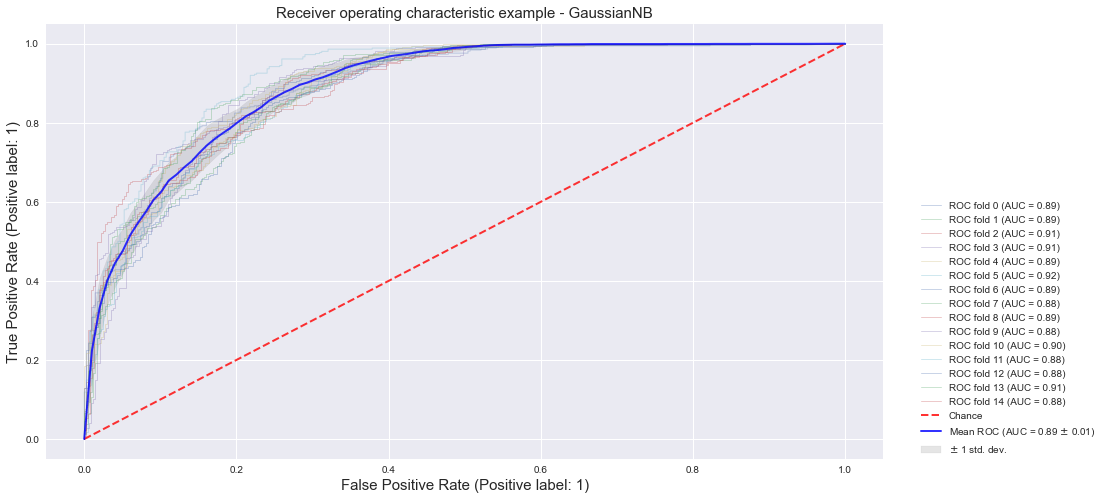

--------------------


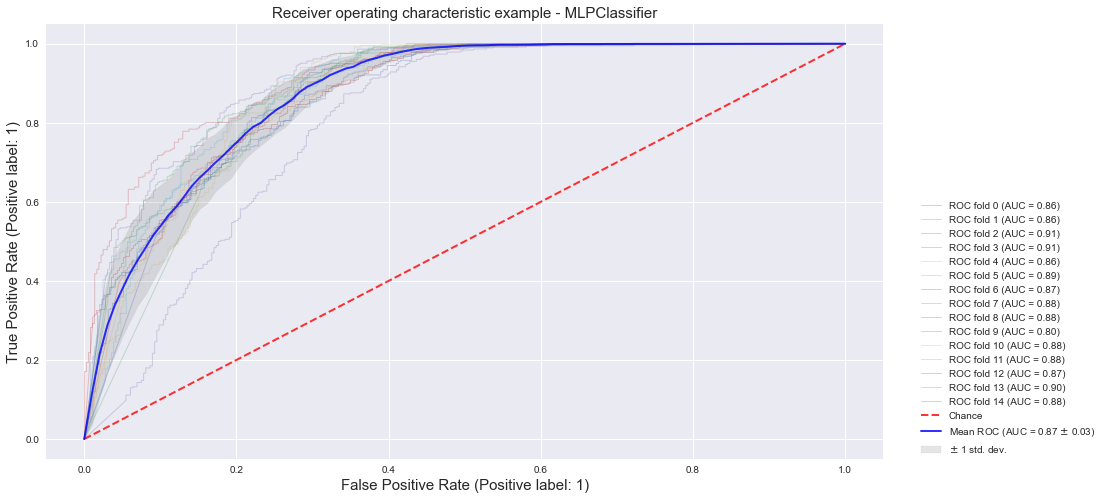

--------------------


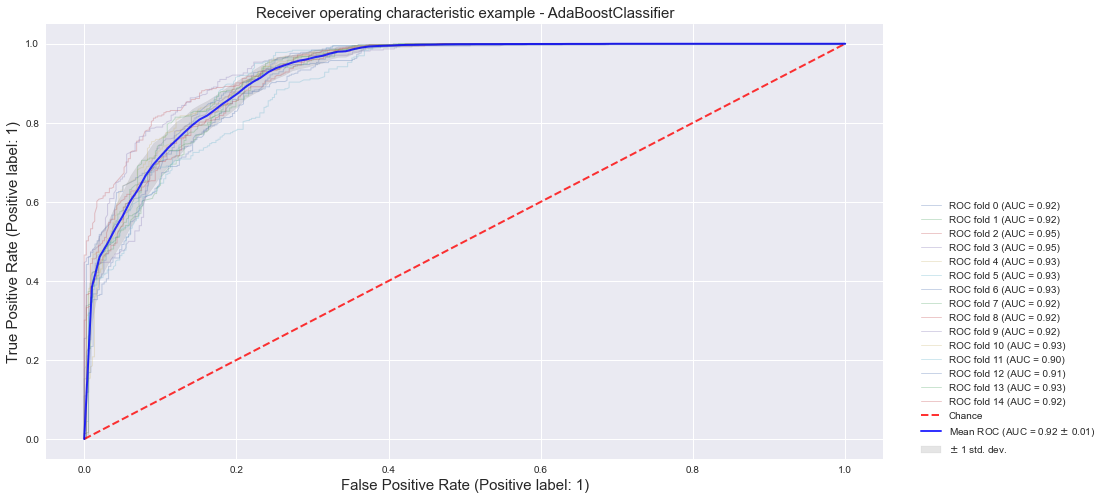

--------------------


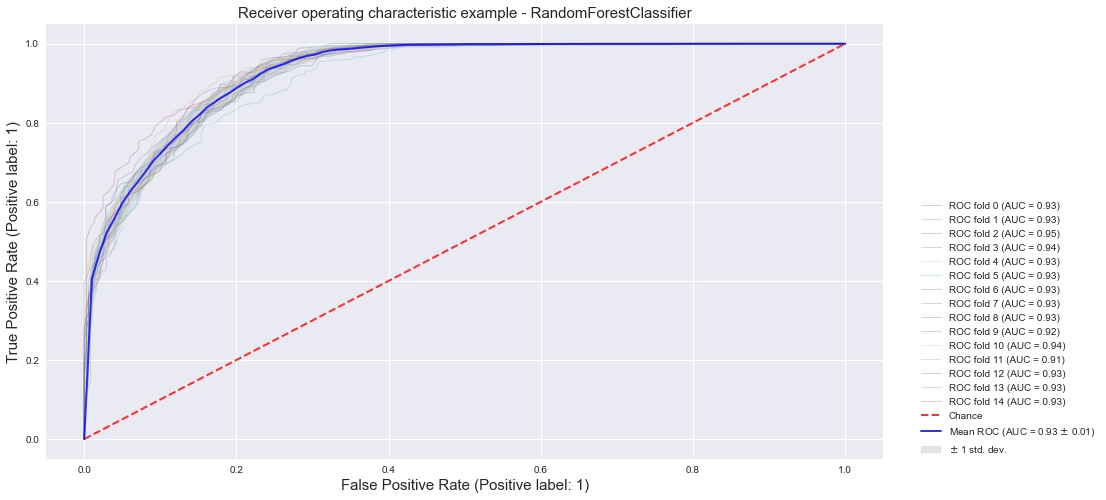

--------------------


In [202]:
for m in models:
    print('--'*10)
    plotROC_fold(m[1], X_bis, y_bis)
print('--'*10)

**Observation**
1. Looking at the graphs above it does not look like the number of Kfold impacts the model decision. The best model is *Random Forest* followed by *AdaBoost*.
2. It seems to impact little the AUC value but overall the AUC score, across all model (excluding AdaBoost and Random Forest), is slightly higher using a 5 KFOLD

Using a 10 Kfold didn't introduce any bias in our study above, as with a 10 KFOLD we selected the best model and the AUC socre is the highest with this KFOLD for the random forest.

#### Tuning the Gradient Boosting
We used gradient boosting but without tuning the parameters. We found that without tuning the parameters, the Gradient Boosting was the best model. Can we imporve this by tuning the parameters ?<br>
Below are the parameters we want to tune:
1. Number of decision trees we will use in the random forest (i.e n_estimators)
2. Depth of each decision trees, as it has an impact on the overfitting (i.e max_depth)
3. Number of features used in each decision tree (i.e max_features)
4. The learning rate (i.e learning_rate)

In [222]:
%%time

n_estimators = [int(x) for x in np.linspace(10,300,4)]
max_depth = [int(x) for x in np.linspace(5,30,4)]
max_features = ['auto', 'sqrt']
learning_rate = [0.1, 0.05]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'learning_rate':learning_rate}

#Specify random_state because it controls both the randomness of the bootstrapping of the samples
gbm = GradientBoostingClassifier(random_state= 123)

grid = GridSearchCV(gbm, param_grid, cv = 10, scoring = 'roc_auc')
grid.fit(X_train,y_train)

print ("Best roc_auc score: %5.3f"%grid.best_score_)
#Parameter setting that gave the best results
print (grid.best_params_)
print (grid.best_estimator_)

Best roc_auc score: 0.934
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 106}
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='auto',
                           n_estimators=106, random_state=123)
Wall time: 2h 22min 19s


Output:<br>
Best roc_auc score: 0.934<br>
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 106}<br>
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='auto',<br>
                           n_estimators=106, random_state=123)<br>
Wall time: 2h 22min 19s

In [223]:
#Model with tuned hyperparameters
gbm = GradientBoostingClassifier(n_estimators=103,
                                learning_rate=0.05,
                                max_depth=5,
                                max_features='auto',
                                random_state= 123)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
AUC:0.9333
              precision    recall  f1-score   support

           0     0.9118    0.7743    0.8375      1068
           1     0.8096    0.9276    0.8646      1105

    accuracy                         0.8523      2173
   macro avg     0.8607    0.8510    0.8510      2173
weighted avg     0.8598    0.8523    0.8513      2173

Wall time: 4.75 s


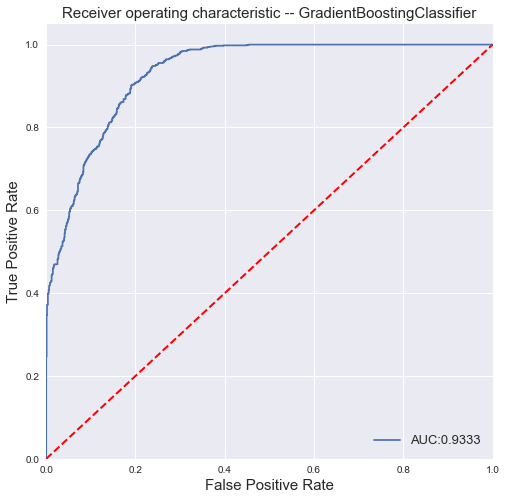

In [226]:
%%time
#Let's look at the fit of the model
plotROCCurve(gbm, X_train, X_test, y_train, y_test)

**Observation**

| Model | AUC | Accuracy |
| --- | --- | --- |
|  Tuned Gradient Boosting | 0.9333 | 0.8523 |
| Gradient Boosting | 0.9337 | 0.8546 |

The tuning is quite disappointing because the model is less accurate with a slightly lower AUC and Accuracy. However, tuning the hyparemeters make the program significantly faster. Time to run plotROCCurve:
- Gradient Boosting: 42s
- Tuned Gradient Boosting: 4.75s

This make sense, in the tuned model we have:
- lower number of iterations (1/3 in the tuned model)
- Lower tree depth (half in the tuned model)

We value a good model but **speed** is also a key parameter to take into account. Tuning the Gradient Boosting make the model 10 times faster ! (The speed feature can be important when evolving in the financial world)

## Conclusion

### Write a summary of what you have found.

Our aim is to predict if loans will be fully paid or charged off. In order to do that, we have been given a data sample of 100 000 observations and 150 variables. By running several features space filtering (removing features with more than 30% missing values or a correlation of less than 3% with the labels) we ended up having 86 138 observations and 34 variables. After a further cleaning data, we ended up removing variables that were redundant or that had a unique value. We encoded categorical data and remained with 29 variables.<br><br>
To create a balanced dataset, we draw 5500 rows at random from each of the two classes and combine them into a new data frame. By splitting our resulting datasample into train and test data, we implemented K-Cross validation for fitting different models and calculated the score using the ROC curve for each one of them. We found that the best model is Random Forest with an AUC of 0.93. <br><br>
Using GridSearch we tuned hyperparameters of the best model (Random Forest) and we found that:
-	N° of estimators = 300 
-	Max depth of tree = 13
-	Criterion = Entropy
-	Max n° of the features = auto

We managed to get an Area Under the Curve and Accuracy score of 93% and 84.81%. We then implemented the Gradient Boosting Classifier (GBC) and obtained an even better result: AUC of 93.34% and an accuracy of 85.18%. 
We also checked if the features importance embedded in the GBC model, were logic. We applied several methods and found that the last_pymnt_amnt, int_rate, sub_grade and term are the most relevant features as those features seem to have a strong economic meaning. <br><br>
**To go further** 
- We decided to plot the AUC of K-fold cross validation. We found that using a 10-Kfold was the optimal choice in our case, but for other models (models excluding AdaBoost and Random forest) it seems that selecting a 5-Kfold result in a higher AUC score.
- Since, Gradient Boosting was the best model we decided to tune its hyperparameters to see if we could improve an already good model. To our surprise, we tune hyperparameters the AUC and Accuracy of the model sliglty lower (within 10$^{-4}$). The model is still really good but by tuning the hyperparameters we make it 10 times faster. 